http://amunategui.github.io/wallstreet/

In [1]:
library(quantmod)


Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


[1] "AMZN"

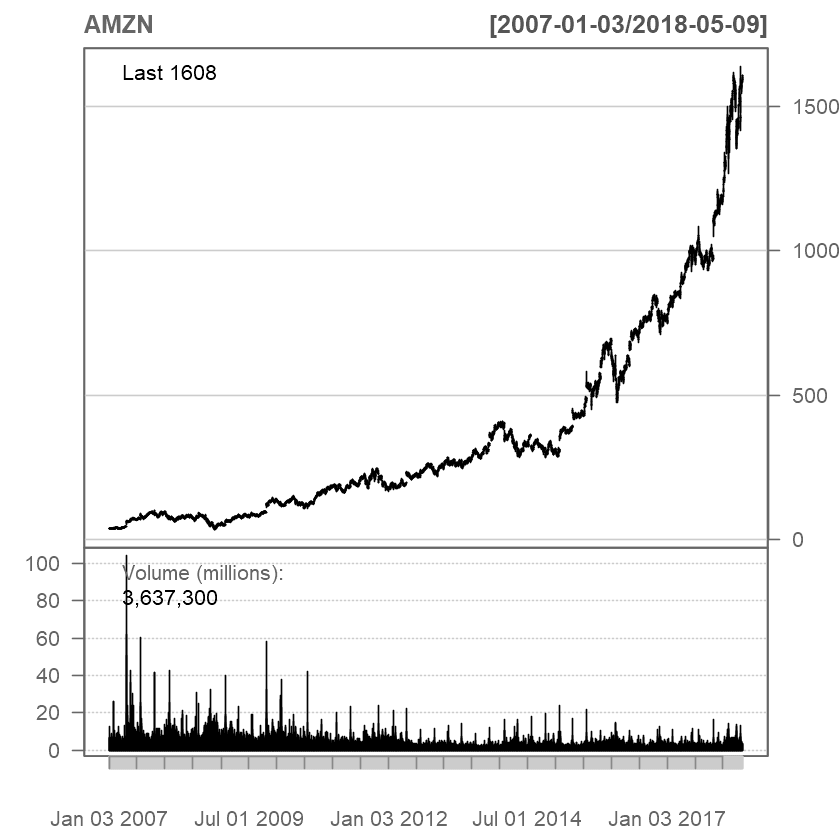

In [2]:
# display a simple bar chart
getSymbols(c("AMZN"))
barChart(AMZN,theme='white.mono',bar.type='hlc') 

[1] "GSPC"

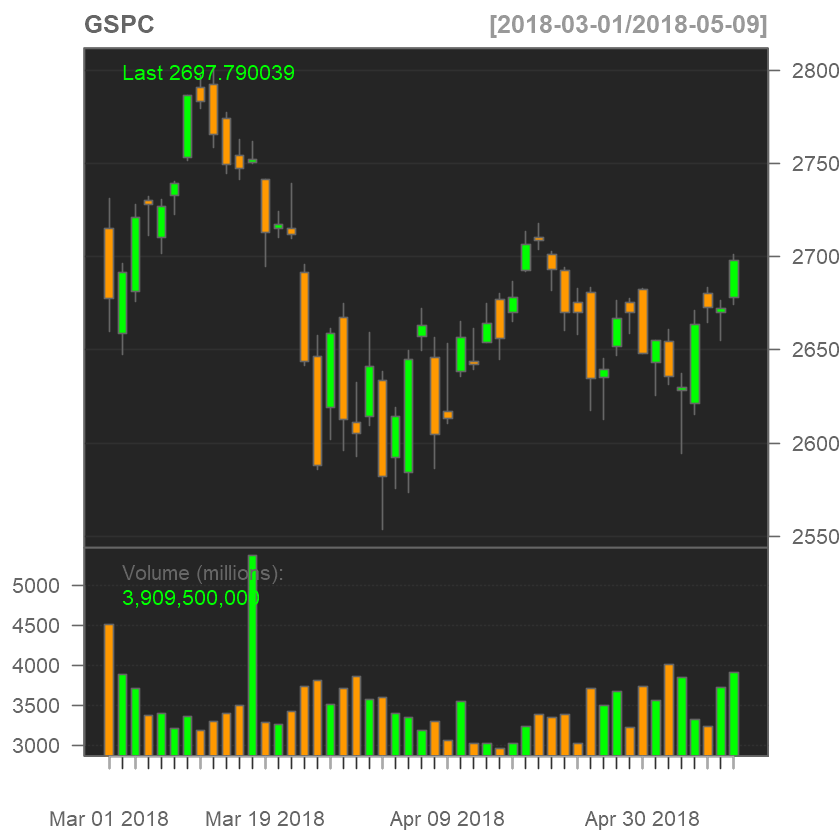

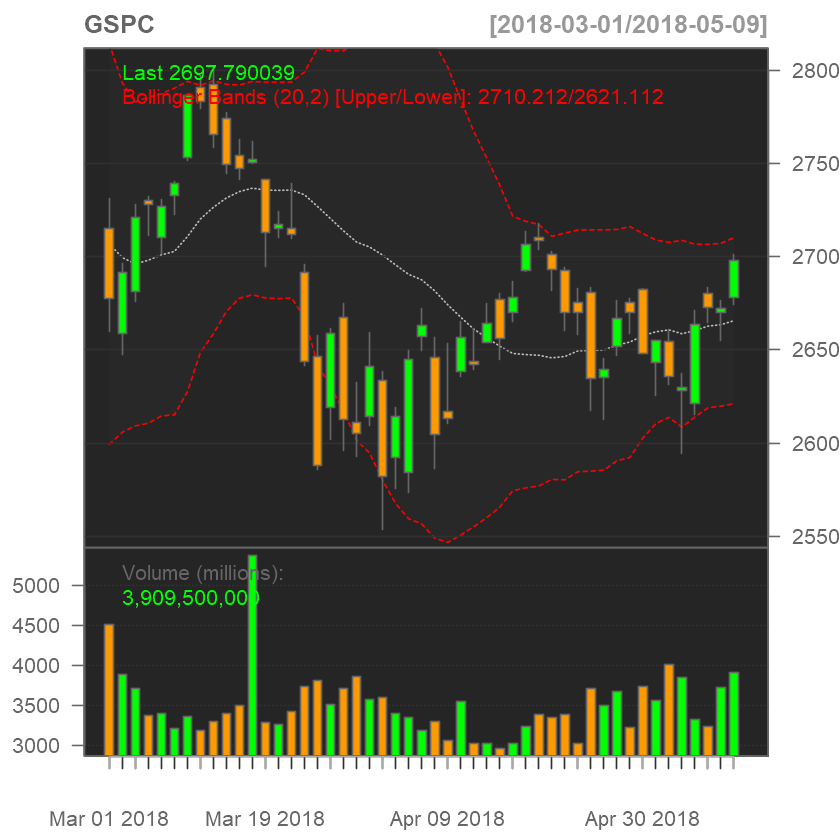

In [3]:
# display a complex chart
getSymbols(c("^GSPC"))
chartSeries(GSPC, subset='last 3 months')
addBBands(n = 20, sd = 2, ma = "SMA", draw = 'bands', on = -1)

In [13]:
# get market data for all symbols making up the Nasdaq 100 index
Nasdaq100_Symbols <- c("AAPL", "ADBE", "ADI", "ADP", "ADSK", "AKAM", "ALTR", "ALXN", 
"AMAT", "AMGN", "AMZN", "ATVI", "AVGO", "BBBY", "BIDU", "BIIB", 
 "CA", "CELG", "CERN", "CHKP", "CHRW", "CHTR", "CMCSA", 
"COST", "CSCO", "CTSH", "CTXS", "DISCA", "DISCK", "DISH", 
"DLTR", "DTV", "EBAY", "EQIX", "ESRX", "EXPD", "EXPE", "FAST", 
"FB", "FFIV", "FISV", "FOXA", "GILD",  "GOOG", "GOOGL", 
"GRMN", "HSIC", "ILMN", "INTC", "INTU", "ISRG", "KLAC", "KHC", 
"LBTYA",  "LMCK", "LVNTA", "MAR", "MAT", "MDLZ", 
"MNST", "MSFT", "MU", "MXIM", "MYL", "NFLX", "NTAP", "NVDA", 
"NXPI", "ORLY", "PAYX", "PCAR", "PCLN", "QCOM", "QVCA", "REGN", 
"ROST", "SBAC", "SBUX", "SIAL", "SIRI", "SNDK", "SPLS", "SRCL", 
"STX", "SYMC", "TRIP", "TSCO", "TSLA", "TXN", "VIAB", "VIP", 
"VOD", "VRSK", "VRTX", "WDC", "WFM", "WYNN", "XLNX", "YHOO")
for( i in 1:length(Nasdaq100_Symbols))
{
    Sys.sleep(1)
    getSymbols(Nasdaq100_Symbols[i]) 
}


Warning message:
"ALTR contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"DTV contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."Warning message:
"LMCK download failed; trying again."

ERROR: Error: LMCK download failed after two attempts. Error message:
HTTP error 404.


In [ ]:
write.csv(...)



In [10]:
# merge them all together
nasdaq100 <- data.frame(as.xts(merge(AAPL, ADBE, ADI, ADP, ADSK, AKAM, 
                ALTR, ALXN,AMAT, AMGN, AMZN, ATVI, AVGO, BBBY, BIDU, BIIB, 
                 CA, CELG, CERN, CHKP, CHRW, CHTR, CMCSA, 
                 COST, CSCO,  CTSH, CTXS, DISCA, DISCK, DISH, 
                 DLTR, DTV, EBAY, EQIX, ESRX, EXPD, EXPE, FAST, 
                 FB, FFIV, FISV, FOXA, GILD, GOOG, GOOGL, 
                 GRMN, HSIC, ILMN, INTC, INTU, ISRG, KLAC, KHC, 
                 LBTYA,  LMCK, LVNTA, MAR, MAT, MDLZ, 
                 MNST, MSFT, MU, MXIM, MYL, NFLX, NTAP, NVDA, 
                 NXPI, ORLY, PAYX, PCAR, PCLN, QCOM, QVCA, REGN, 
                 ROST, SBAC, SBUX, SIAL, SIRI, SNDK, SPLS, SRCL, 
                 STX, SYMC, TRIP, TSCO, TSLA, TXN, VIAB, VIP, 
                 VOD, VRSK, VRTX, WDC, WFM, WYNN, XLNX, YHOO)))
head(nasdaq100[,1:12],2)

ERROR: Error in merge.xts(AAPL, ADBE, ADI, ADP, ADSK, AKAM, ALTR, ALXN, AMAT, : object 'KHC' not found


In [ ]:
write.csv(...)

In [ ]:


 






# set outcome variable
outcomeSymbol <- 'FISV.Volume'

# shift outcome value to be on same line as predictors
library(xts)
nasdaq100 <- xts(nasdaq100,order.by=as.Date(rownames(nasdaq100)))
nasdaq100 <- as.data.frame(merge(nasdaq100, lm1=lag(nasdaq100[,outcomeSymbol],-1)))
nasdaq100$outcome <- ifelse(nasdaq100[,paste0(outcomeSymbol,'.1')] > nasdaq100[,outcomeSymbol], 1, 0)

# remove shifted down volume field as we don't care by the value
nasdaq100 <- nasdaq100[,!names(nasdaq100) %in% c(paste0(outcomeSymbol,'.1'))]

# cast date to true date and order in decreasing order
nasdaq100$date <- as.Date(row.names(nasdaq100))
nasdaq100 <- nasdaq100[order(as.Date(nasdaq100$date, "%m/%d/%Y"), decreasing = TRUE),]

# calculate all day differences and populate them on same row
GetDiffDays <- function(objDF,days=c(10), offLimitsSymbols=c('outcome'), roundByScaler=3) {
        # needs to be sorted by date in decreasing order
        ind <- sapply(objDF, is.numeric)
        for (sym in names(objDF)[ind]) {
                if (!sym %in% offLimitsSymbols) {
                        print(paste('*********', sym))
                        objDF[,sym] <- round(scale(objDF[,sym]),roundByScaler)
                        
                        print(paste('theColName', sym))
                        for (day in days) {
                                objDF[paste0(sym,'_',day)] <- c(diff(objDF[,sym],lag = day),rep(x=0,day)) * -1
                        }
                }
        }
        return (objDF)
}

# call the function with the following differences
nasdaq100 <- GetDiffDays(nasdaq100, days=c(1,2,3,4,5,10,20), offLimitsSymbols=c('outcome'), roundByScaler=2)

# drop most recent entry as we don't have an outcome
nasdaq100 <- nasdaq100[2:nrow(nasdaq100),]

# take a peek at YHOO features:
dput(names(nasdaq100)[grepl('YHOO.',names(nasdaq100))])

# well use POSIXlt to add day of the week, day of the month, day of the year
nasdaq100$wday <- as.POSIXlt(nasdaq100$date)$wday
nasdaq100$yday <- as.POSIXlt(nasdaq100$date)$mday
nasdaq100$mon<- as.POSIXlt(nasdaq100$date)$mon
 
# remove date field and shuffle data frame
nasdaq100 <- subset(nasdaq100, select=-c(date))
nasdaq100 <- nasdaq100[sample(nrow(nasdaq100)),]
 
# let's model
library(xgboost)
predictorNames <- names(nasdaq100)[names(nasdaq100) != 'outcome']
 
set.seed(1234)
split <- sample(nrow(nasdaq100), floor(0.7*nrow(nasdaq100)))
train <-nasdaq100[split,]
test <- nasdaq100[-split,]
 
bst <- xgboost(data = as.matrix(train[,predictorNames]),
               label = train$outcome,
               verbose=0,
               eta = 0.1,
               gamma = 50, 
               nround = 50,
               colsample_bytree = 0.1,
               subsample = 8.6,
               objective="binary:logistic")
 
predictions <- predict(bst, as.matrix(test[,predictorNames]), outputmargin=TRUE)
 
library(pROC)
auc <- roc(test$outcome, predictions)
print(paste('AUC score:', auc$auc))